# **7-1. 인공 신경망**

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


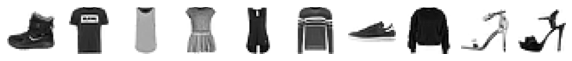

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# 패션 MNIST 데이터 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

# 몇 개의 샘플 이미지 출력하기
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

# 처음 10개 샘플의 타깃값을 리스트로 만든 후 출력
print([train_target[i] for i in range(10)])

# 레이블당 샘플 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

In [ ]:
# 정규화 & 2차원 배열 -> 1차원 배열로 만들기
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)
print(train_scaled.shape)

# 교차 검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

(60000, 784)
0.8195666666666668


In [ ]:
# 텐서플로
import tensorflow as tf
# 케라스
from tensorflow import keras

# 검증 세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
# 밀집층 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

# 신경망 모델
model = keras.Sequential(dense)


In [ ]:
# 훈련하기 전 설정 단계
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 훈련
model.fit(train_scaled, train_target, epochs=5)

# 모델의 성능 확인
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6094 - accuracy: 0.7930
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4788 - accuracy: 0.8374
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4565 - accuracy: 0.8468
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4436 - accuracy: 0.8533
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4407 - accuracy: 0.8541


[0.44069162011146545, 0.8540833592414856]

# **7-2. 심층 신경망**

In [ ]:
# 데이터셋 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 이미지의 픽셀값을 0 ~ 255 범위 -> 0 ~1 사이로 변환
# 28 x 28 크기의 2차원 배열 -> 784 크기의 1차원 배열로
# 훈션 세트와 검증 세트로 나누기
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 시그모이드 활성화 함수를 사용한 은닉층 + 소프트맥스 함수를 사용한 출력층
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) ### 은닉층
dense2 = keras.layers.Dense(10, activation='softmax') ### 출력층


In [ ]:
# 심층 신경망 만들기
model = keras.Sequential([dense1, dense2])

# 층에 대한 정보
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만들기
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid',input_shape=(784,),name='hidden'),
                          keras.layers.Dense(10, activation='softmax',name='output')], name='패션 MNIST 모델')

# 모델 요약
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 아주 많은 층을 추가할 때
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5633 - accuracy: 0.8080
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4084 - accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3725 - accuracy: 0.8656
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3500 - accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3323 - accuracy: 0.8779


In [ ]:
# Flatten 층 & relu 함수로 모델 만들기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 훈련 데이터 준비
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# 검증 세트에서의 성능 확인
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5347 - accuracy: 0.8114
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3906 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3527 - accuracy: 0.8733
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3323 - accuracy: 0.8815
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8702


[0.37777841091156006, 0.8702499866485596]

In [ ]:
# Adam 클래스로 모델 훈련해보기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5287 - accuracy: 0.8152
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3977 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3561 - accuracy: 0.8707
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3294 - accuracy: 0.8791
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8744


[0.34370842576026917, 0.8744166493415833]

# **7-3. 신경망 모델 훈련**

In [ ]:
# 패션 MNIST 데이터셋을 적재 & 훈련 세트와 검증 세트로 나눔
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 만드는 함수 : a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

# 모델 호출
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


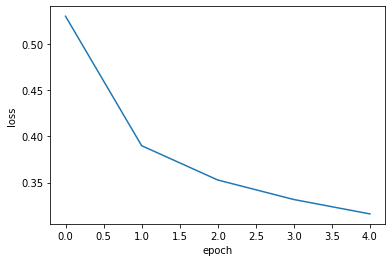

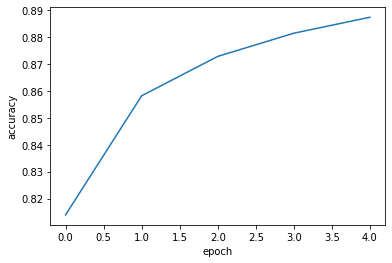

In [ ]:
# fit() 메서드의 결과를 history 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

# history 객체에 들어있는 history 딕셔너리 의 key 확인
print(history.history.keys())

# history 속성에 포함된 손실과 정확도를 그래프로 나타내기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

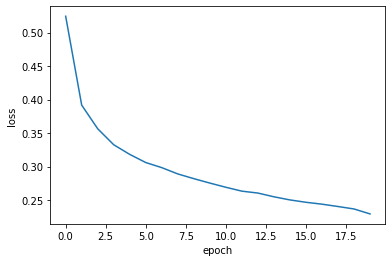

In [ ]:
# 에포크 횟수 늘려서 모델 훈련 & 손실 그래프 출력
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


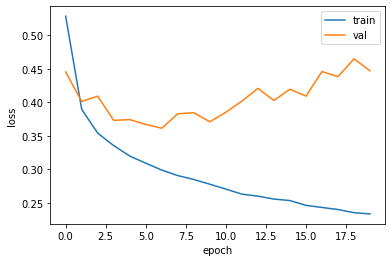

In [ ]:
# 에포크마다 검증 손실을 계산하기 위해 검증 데이터 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# history 객체에 들어있는 history 딕셔너리의 key 확인
print(history.history.keys())

# 훈션 손실과 검증 손실 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

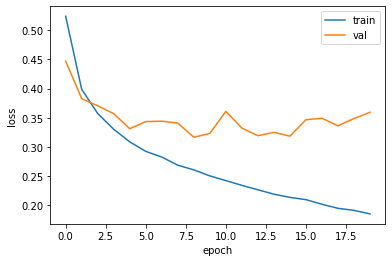

In [ ]:
# Adam 옵티마이저 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


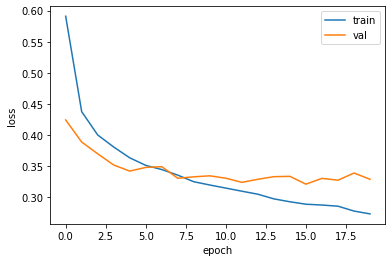

In [ ]:
# 드롭아웃 적용
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 모델 평가 & 그래프 그려보기
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 에포크 횟수를 10으로 지정 & 모델 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

# 훈련된 모델의 파라미터 저장
model.save_weights('model-weights.h5')

# 모델 구조와 모델 파라미터 저장
model.save('model-whole.h5')

# 두 파일이 잘 만들어졌는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May  2 11:38 model-seights.h5
-rw-r--r-- 1 root root 333448 May  2 11:47 model-weights.h5
-rw-r--r-- 1 root root 982664 May  2 11:47 model-whole.h5


In [ ]:
# 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# 검증 정확도 확인
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8835833333333334


In [ ]:
# model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8836


[0.3229525089263916, 0.8835833072662354]

In [ ]:
# 콜백 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

# 모델을 다시 읽어서 예측 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8895


[0.317361444234848, 0.8895000219345093]

7


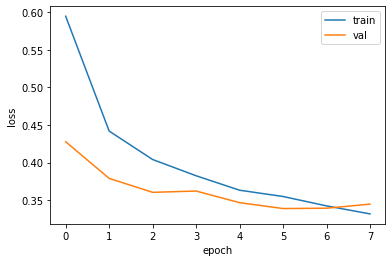

375/375 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8776


[0.33880677819252014, 0.8775833249092102]

In [ ]:
# 조기 종료를 위한 EarlyStopping 콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 몇 번째 에포크에서 훈련이 중지되었는지 출력
print(early_stopping_cb.stopped_epoch)

# 훈련 손실과 검증 손실 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

# **8-2. 합성곱 신경망을 사용한 이미지 분류**

In [2]:
# 패션 MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

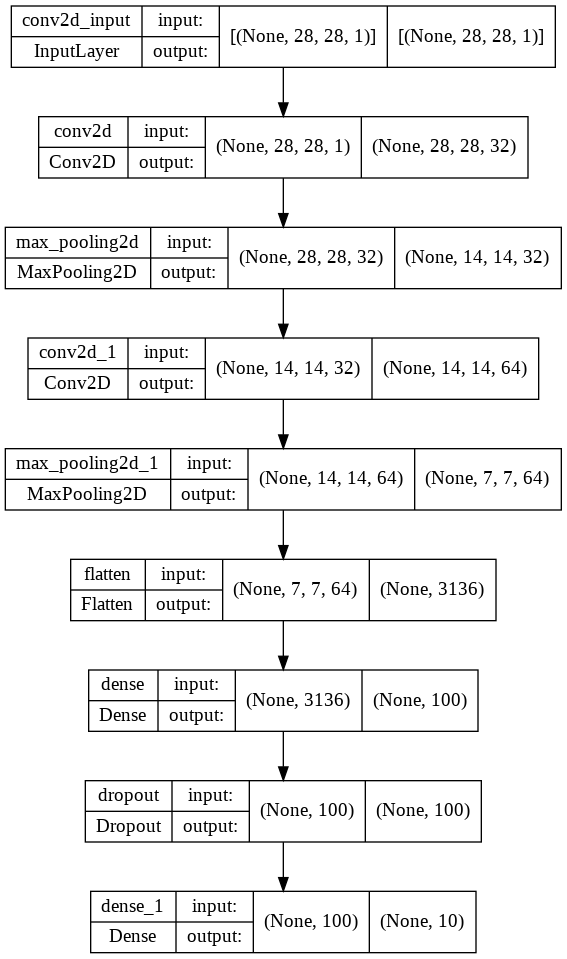

In [3]:
# 합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten()) ### 3차원 특성 맵을 일렬로 펼치기
model.add(keras.layers.Dense(100, activation='relu')) ### 은닉층
model.add(keras.layers.Dropout(0.4)) ### 드롭아웃
model.add(keras.layers.Dense(10, activation='softmax')) ### 출력층

model.summary()

# 층의 구성을 그림으로 표현
keras.utils.plot_model(model)

keras.utils.plot_model(model, show_shapes=True)

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5354 - accuracy: 0.8070 - val_loss: 0.3230 - val_accuracy: 0.8806
Epoch 2/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.3540 - accuracy: 0.8739 - val_loss: 0.2916 - val_accuracy: 0.8926
Epoch 3/20
1500/1500 [==============================] - 82s 55ms/step - loss: 0.3030 - accuracy: 0.8919 - val_loss: 0.2574 - val_accuracy: 0.9044
Epoch 4/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2728 - accuracy: 0.9007 - val_loss: 0.2399 - val_accuracy: 0.9118
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2485 - accuracy: 0.9088 - val_loss: 0.2352 - val_accuracy: 0.9142
Epoch 6/20
1500/1500 [==============================] - 89s 59ms/step - loss: 0.2277 - accuracy: 0.9170 - val_loss: 0.2225 - val_accuracy: 0.9174
Epoch 7/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2111 - accuracy: 0.9220 - val_loss: 0.2272 -

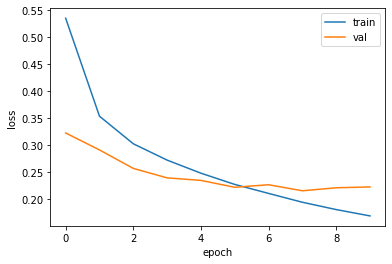

375/375 [==============================] - 5s 13ms/step - loss: 0.2160 - accuracy: 0.9226


[0.215988427400589, 0.9225833415985107]

In [4]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 성능 평가
model.evaluate(val_scaled, val_target)

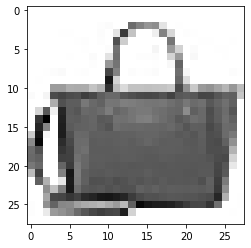

[[1.7503015e-22 4.6987203e-31 2.5564738e-23 3.9363923e-25 4.1614874e-23
  1.0366694e-18 2.6565713e-21 3.7322365e-25 1.0000000e+00 1.8653054e-22]]


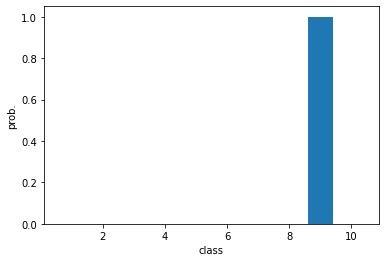

가방


In [ ]:
# 첫 번째 샘플 이미지 확인
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

# 첫 번째 샘플의 10개의 클래스에 대한 예측 확률
preds = model.predict(val_scaled[0:1])
print(preds)

# 첫 번째 샘플의 예측 확률 막대그래프
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

# 패션 MNIST 데이터셋의 레이블 리스트로 저장
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

# 가장 큰 인덱스를 찾아 출력
import numpy as np
print(classes[np.argmax(preds)])

In [ ]:
# 모델을 실전에 투입
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.2386 - accuracy: 0.9157


[0.23857051134109497, 0.9157000184059143]

# **8-3. 합성곱 신경망의 시각화**

In [5]:
# 어떤 가중치를 학습했는지 확인
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

(3, 3, 1, 32) (32,)
-0.032868564 0.2717506


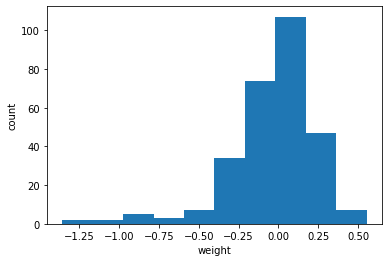

In [6]:
# 첫 번째 합성곱 층의 가중치 조사 -> 가중치 & 절편
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

# 가중치 배열의 평균, 표준편차
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

# 가중치의 분포 히스토그램
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))   ### 히스토그램을 위해 1차원 배열로 전달
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

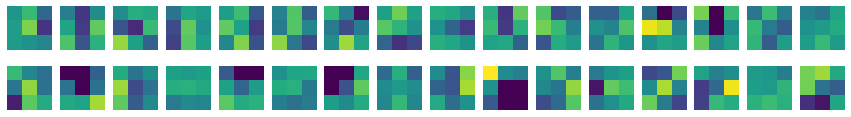

In [7]:
# 32개의 커널을 16개씩 두 줄에 출력
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
-0.0011728136 0.083715744


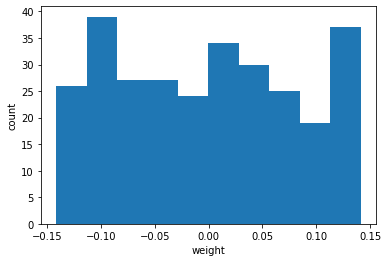

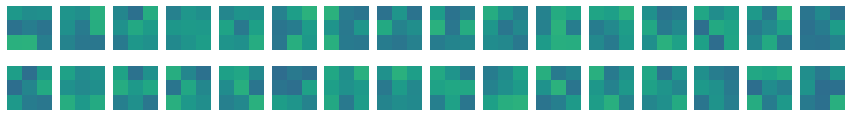

In [8]:
# 훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

# 이 모델의 첫 번째 층의 가중치
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

# 가중치의 평균, 표준편차
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

# 가중치 배열 히스토그램 표현
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 커널 그림으로 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [10]:
# 모델의 입력
print(model.input)

# 모델의 input과 첫 번째 합성곱 층의 output을 연결하는 새로운 conv_acti 모델
conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


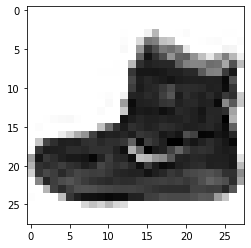

In [11]:
# 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플 그리기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

(1, 28, 28, 32)


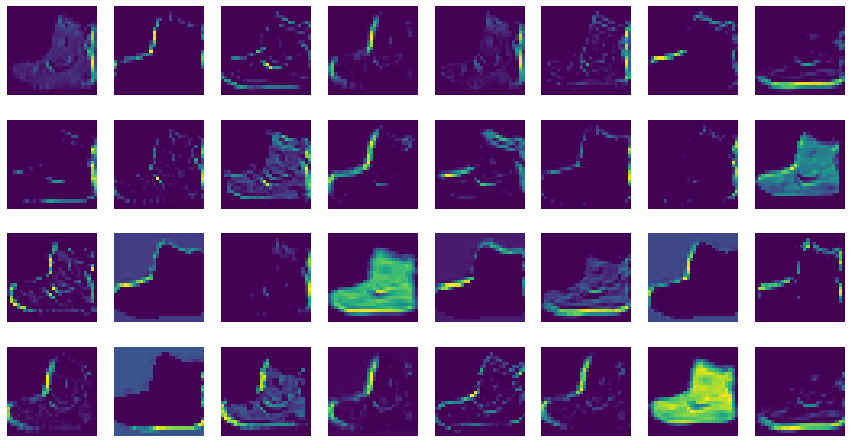

In [12]:
# 첫 번째 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

# 총 32개의 특성 맵 출력
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

(1, 14, 14, 64)


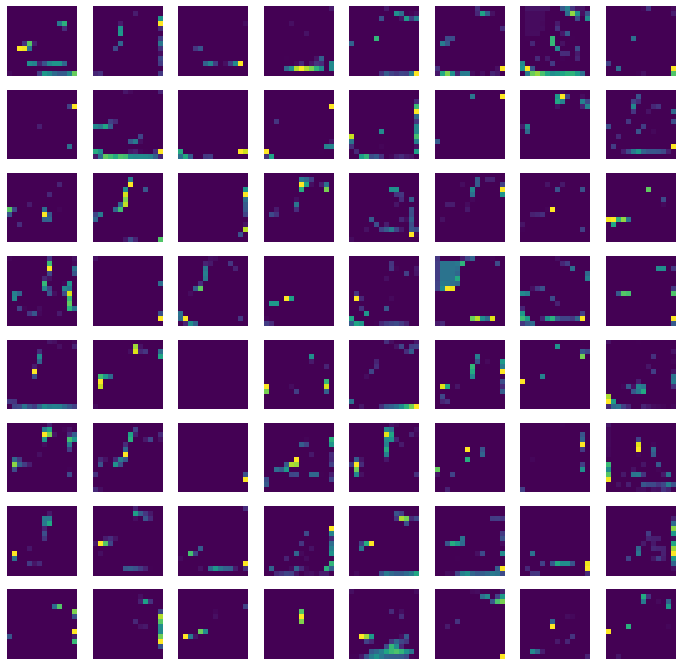

In [13]:
# 두 번째 합성곱 층이 만든 특성 맵도 확인
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

# 특성맵 64개 그려보기
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()